<a href="https://colab.research.google.com/github/stmulugheta/Introduction-to-Web-Scraping/blob/main/FooTech_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as plex

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## General

Importing the Data

In [ ]:
path='drive/MyDrive/Colab Notebooks/Omdena/FoodTech/sales_with_prod_name.csv'
df = pd.read_csv(path)
df

,date,product_id,store_id,sales,product_name
0,2020-01-01,p39288641,s603,122,Fijne bonen
1,2020-01-01,p39288641,s703,64,Fijne bonen
2,2020-01-01,p39288641,s803,25,Fijne bonen
3,2020-01-01,p39288641,s903,8,Fijne bonen
4,2020-01-01,p39288641,s453,154,Fijne bonen
...,...,...,...,...,...
48559,2021-09-29,p39231702,s417,49,Pompoen
48560,2021-09-30,p39231702,s703,89,Pompoen
48561,2021-09-30,p39231702,s803,54,Pompoen
48562,2021-09-30,p39231702,s903,27,Pompoen


Examining the data

In [ ]:
df['store_id'].unique()

array(['s603', 's703', 's803', 's903', 's453', 's895', 's417'],
      dtype=object)

In [ ]:
df['product_name'].unique()

array(['Fijne bonen', 'Rode Paprika', 'Citroen', 'Sla multi', 'Kiw',
       'Witte champignon', 'Aubergine', 'Mango', 'Jazz Appel',
       'Sungold Kiwi', 'Notensla', 'Sjalot', 'Trostomaat', 'Spruit',
       'Kropsla', 'Kerstomaat', 'Courgette', 'Rode ajuin', 'Pompoen'],
      dtype=object)

In [ ]:
df[['product_id', 'store_id']].describe()

,product_id,store_id
count,48564,48564
unique,20,7
top,p39288641,s903
freq,4473,10863


In [ ]:
storeid= ['s603', 's703', 's803', 's903', 's453', 's895', 's417']
productnames = ['Fijne bonen', 'Rode Paprika', 'Citroen', 'Sla multi', 'Kiw',
       'Witte champignon', 'Aubergine', 'Mango', 'Jazz Appel',
       'Sungold Kiwi', 'Notensla', 'Sjalot', 'Trostomaat', 'Spruit',
       'Kropsla', 'Kerstomaat', 'Courgette', 'Rode ajuin', 'Pompoen']

In [ ]:
s603_df = df.loc[df['store_id']=='s603']
s703_df = df.loc[df['store_id']=='s703']
s803_df = df.loc[df['store_id']=='s803']
s903_df = df.loc[df['store_id']=='s903']
s453_df = df.loc[df['store_id']=='s453']
s417_df = df.loc[df['store_id']=='s417']


product_id
p39216303    AxesSubplot(0.125,0.125;0.775x0.755)
p39223703    AxesSubplot(0.125,0.125;0.775x0.755)
p39229782    AxesSubplot(0.125,0.125;0.775x0.755)
p39242361    AxesSubplot(0.125,0.125;0.775x0.755)
p39246803    AxesSubplot(0.125,0.125;0.775x0.755)
p39287803    AxesSubplot(0.125,0.125;0.775x0.755)
p39288641    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sales, dtype: object

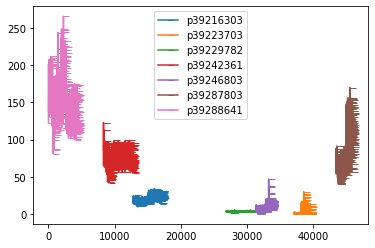

In [ ]:
s603_df.groupby(['product_id'])['sales'].plot(marker=True,legend=True)

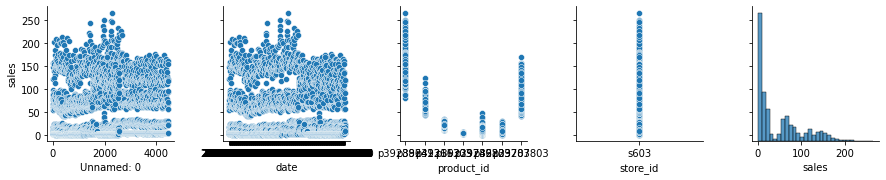

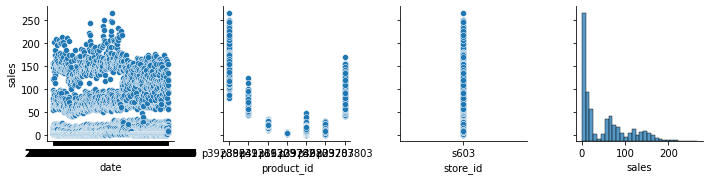

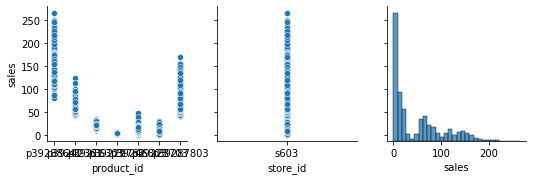

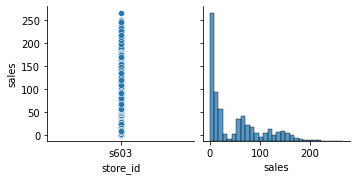

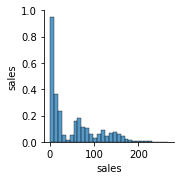

In [ ]:
for i in range(0, len(s603_df.columns),1): 
  sns.pairplot(s603_df, x_vars=s603_df.columns[i:i+5], y_vars=['sales']) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



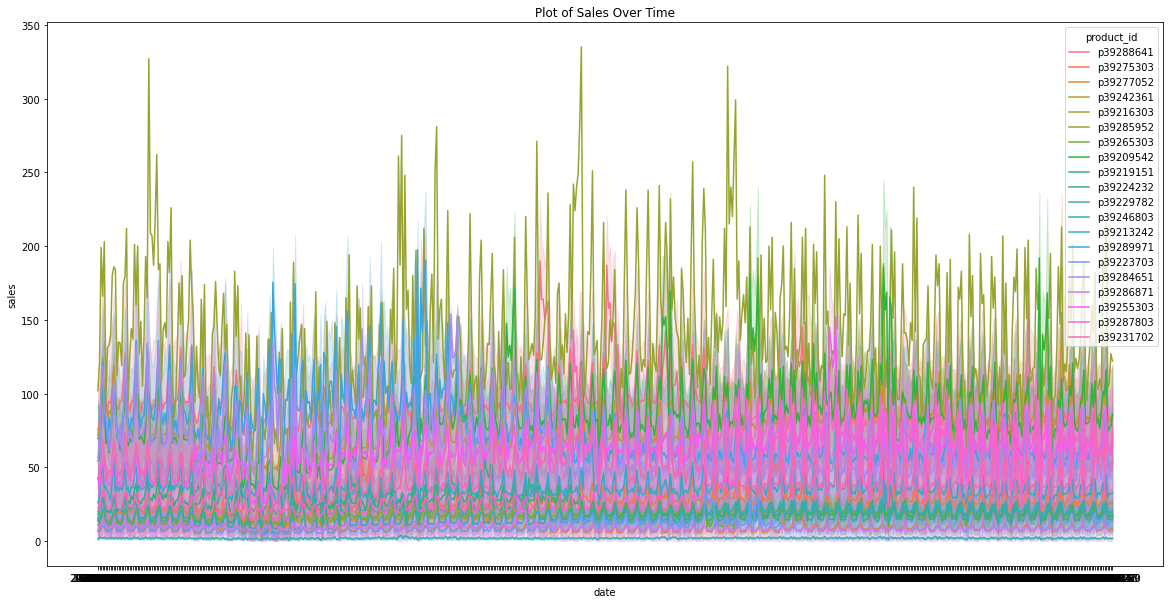

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(df['date'], df['sales'], hue = df['product_id'])
ax.set_title('Plot of Sales Over Time')
fig.show()

In [ ]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(s603_df['date'], s603_df['sales'], hue = s603_df['product_id'])
ax.set_title('Plot of Sales Over Time')
fig.show()

In [ ]:
fig = plex.line(s603_df, x ='date', y = 'sales',color= "product_name", title = 'Plot of Sales Over Time')
fig.show()

In [ ]:
fig = plex.line(s803_df, x ='date', y = 'sales',color= "product_name", title = 'Plot of Sales Over Time')
fig.show()

In [ ]:
fig = plex.line(s903_df, x ='date', y = 'sales',color= "product_name", title = 'Plot of Sales Over Time')
fig.show()

In [ ]:
fig = plex.line(s703_df, x ='date', y = 'sales',color= "product_name", title = 'Plot of Sales Over Time')
fig.show()

In [ ]:
fig = plex.line(s453_df, x ='date', y = 'sales',color= "product_name", title = 'Plot of Sales Over Time')
fig.show()

In [ ]:
fig = plex.line(s417_df, x ='date', y = 'sales',color= "product_name", title = 'Plot of Sales Over Time')
fig.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=7, cols=1)
k=1
for i in storeid:
  store_df = df.loc[df['store_id']==i]
  fig.append_trace(go.Scatter(x =store_df['date'], y = store_df['sales']), row=k, col=1)
  k=k+1

fig.show()

# Aldi

In [ ]:
path='drive/MyDrive/Colab Notebooks/Omdena/FoodTech/aldi_promos_combined_dataset.csv'
aldi = pd.read_csv(path)
aldi

,brand,quantity,product_category,product_desc,promo_type,leaflet,promo_date,published_date,promo_url,promo_scrape_date,orig_price,promo_start_dt,promo_end_dt,owned_brand,promo_price,product_id,product_name
0,FRANTASTIQUE®,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,wo 06/10,2021-09-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,2.99,4194,Franse salami
1,FRANTASTIQUE®,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,wo 06/10,2021-09-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,2.99,5096,Wildpastei 3 st.
2,FRANTASTIQUE®,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,wo 06/10,2021-09-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,1.99,3840,Rillettes
3,FRANTASTIQUE®,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,wo 06/10,2021-09-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,2.99,970,Kalkoenragout
4,FRANTASTIQUE®,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,wo 06/10,2021-09-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,7.99,4634,Cassoulet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,NaN,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,za 06/11,2021-10-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,9.99,6303,Buitenmat
462,TWIDO HOUSEHOLD®,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,za 06/11,2021-10-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,2.99,3001026,Borstelset
463,NaN,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,za 06/11,2021-10-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,5.99,1072,Orchidee
464,GARDENLINE®,1,"{""primaryCategory"": ""n/a"", ""subCategory1"": ""n/...",NaN,N,N,za 06/11,2021-10-24,https://www.aldi.be/nl/onze-aanbiedingen/aanbi...,25-10-2021,NaN,NaN,NaN,Not Owned,4.99,1374,Kweekpakket voor champignons


In [ ]:
aldi['published_date'] = pd.to_datetime( aldi['published_date'])

In [ ]:
aldi.describe()

,quantity,product_desc,orig_price,promo_start_dt,promo_end_dt,promo_price,product_id
count,466.0,0.0,0.0,0.0,0.0,466.000000,4.660000e+02
mean,1.0,NaN,NaN,NaN,NaN,11.251373,1.007901e+06
std,0.0,NaN,NaN,NaN,NaN,19.640731,1.415615e+06
min,1.0,NaN,NaN,NaN,NaN,0.350000,1.150000e+02
25%,1.0,NaN,NaN,NaN,NaN,2.750000,3.854000e+03
50%,1.0,NaN,NaN,NaN,NaN,5.190000,6.908000e+03
75%,1.0,NaN,NaN,NaN,NaN,12.090000,3.000918e+06
max,1.0,NaN,NaN,NaN,NaN,189.000000,3.002988e+06


In [ ]:
aldi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   brand              362 non-null    object        
 1   quantity           466 non-null    int64         
 2   product_category   466 non-null    object        
 3   product_desc       0 non-null      float64       
 4   promo_type         466 non-null    object        
 5   leaflet            466 non-null    object        
 6   promo_date         466 non-null    object        
 7   published_date     466 non-null    datetime64[ns]
 8   promo_url          466 non-null    object        
 9   promo_scrape_date  466 non-null    object        
 10  orig_price         0 non-null      float64       
 11  promo_start_dt     0 non-null      float64       
 12  promo_end_dt       0 non-null      float64       
 13  owned_brand        466 non-null    object        
 14  promo_pric

In [ ]:
aldi.isna().sum()

brand                104
quantity               0
product_category       0
product_desc         466
promo_type             0
leaflet                0
promo_date             0
published_date         0
promo_url              0
promo_scrape_date      0
orig_price           466
promo_start_dt       466
promo_end_dt         466
owned_brand            0
promo_price            0
product_id             0
product_name           0
dtype: int64